# Pipeline de Data Science: pandas, seaborn y scikit-learn

## Temario

- ¿Cómo se usa la **libreria pandas** para leer datos en Python?
- ¿Cómo se usa la **libreria seaborn** para visualizar datos?
- ¿Qué es la **regresión lineal**, y cómo funciona?
- ¿Cómo se **entrena e interpreta** una regresión lineal en scikit-learn?
- ¿Cuáles son las **medidas de desempeño** para problemas de regresión?
- ¿Cómo selecciono las **caracteristicas** a incluir en mis modelos?

## Tipos de Aprendizaje Supervisado

- **Classificación:** Predice una respuesta categorica (clases)
- **Regresión:** Predice una respuesta contínua (real valuada)

## Leyendo Datos utilizando Pandas

**Pandas:** libreria popular de Python para exploración de datos, manipulación y análisis.

- Usuarios de Anaconda: pandas viene incluido
- Otros usuarios: [installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)

In [1]:
# Manera convencional para incluir la libreria
import pandas as pd

In [2]:
#Lee un archivo CSV directamente de una URL y guarda los resultados
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Muestra las 5 primeras filas
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Tipos de objetos principales:

- **DataFrame:** filas y columnas (Como una planilla de cálculo)
- **Series:** una sola columna

In [3]:
# Muestra las 5 últimas filas
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# Para chequear la forma de la matriz
data.shape

(200, 4)

¿Cuáles son las características?

- **TV:** miles de dolares gastados en publicidad por TV por un producto.
- **Radio:** miles de dolares gastados en Radio
- **Newspaper:** miles de dolares gastados en Diarios escritos

¿Cuál es la variable respuesta?
- **Sales:** ventas del producto (miles)

¿Qué más sabemos?
- Debido a que la variable respuesta es contínua, es un problema de regresión.
- Hay 200 observaciones (filas), y cada una es un mercado único.

## Visualizando la data usando seaborn

**Seaborn:** Libreria de visualización de datos construida sobre Matplotlib

- Anaconda: ejecutar **`conda install seaborn`** en una ventana de comando
- Otros usuario: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [5]:
# Manera convencional de importar seaborn
import seaborn as sns

# Permitir que los graficos aparezcan en las celdas
%matplotlib inline

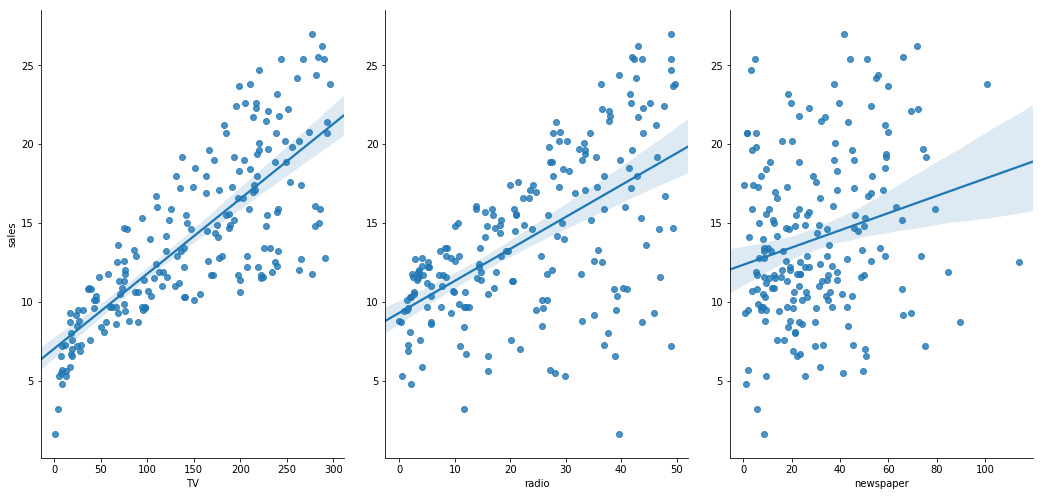

In [6]:
# Visualizar la relación entre las caracteristitas y la respuesta usando scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Regresión lineal

**Ventajas:** Rápido, no requiere ajustes, altamente interpretable, fácil de entender

**Desventajas:** Muy difíl de que se obtenga un buen desempeño predictivo (presume una relación lineal entre cada una de las caracteristicas y la respuesta.)

### Forma de la regresión lineal

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ es la respuesta
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (primera característica)
- $\beta_n$ es el coeficiente para $x_n$ (caracteristica n-esima)

En este caso en particular:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Los valores $\beta$ son llamados **coeficientes del modelo**. Estos valores se "aprenden" durante el paso de ajuste del modelo utilizando el criterio "mínimos cuadrados". Después, el modelo "entrenado" se puede usar para hacer pronósticos.

## Preparando X e y usando pandas

- scikit-learn espera que X (matriz de caracteristicas) e y (vector de respuesta) sean arreglos Numpy.
- Sin embargo, pandas está construido sobre Numpy.
- Por lo tanto, X puede ser un DataFrame de pandas e y pandas Series.

In [7]:
# Crear una lista de Python con los nombre de las caracteristicas
feature_cols = ['TV', 'radio', 'newspaper']

# Use esta lista para seleccionar el subconjunto del DataFrame original
X = data[feature_cols]

# Comando equivalente para hacerlo en una linea
X = data[['TV', 'radio', 'newspaper']]

# Imprime las 5 primeras filas
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# Chequea el tipo y forma de X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# Selecciona una "Serie" del DataFrame
y = data['sales']


# Comando equivalente que funciona si no hay espacios en la columna nombre
y = data.sales

# Imprime los 5 primeros valores
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [10]:
# Chequea el tipo y forma de "y"
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Particionando X e y en conjuntos de entrenamiento y test

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Por defecto el particionamiento es 75% entrenamiento y 25% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Regresión lineal en scikit-learn

In [13]:
# importar el modelo
from sklearn.linear_model import LinearRegression, Ridge

# Instanciarlo
linreg = LinearRegression()
ridge=Ridge(alpha=0.00000001,normalize=True)

# Ajustar el modelo a los datos de entrenamiento (aprender los coeficientes)
linreg.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

### Interpretando los coeficientes del modelo

In [14]:
# Imprime el intercepto y los coeficientes de la Regresión lineal
print(linreg.intercept_)
print(linreg.coef_)

# Imprime el intercepto y los coeficientes de la Regresión lineal
print(ridge.intercept_)
print(ridge.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]
2.876966715708347
[0.04656457 0.17915812 0.00345047]


In [15]:
# "parea" los nombres con sus coeficientes
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

¿Cómo se interpreta el **coeficientes TV** (0.0466)?

- Para un monto dado de gasto de advertising de Radio y Newspaper, **una "unidad" de incremente en el gasto de advertising en TV** se asocia **0.0466 "unidades" de incremento en Ventas**.
- O más claramente: 
- Or more clearly: - Para un monto dado de gasto de advertising de Radio y Newspaper, **gastar 1000 adicionales en advertising en TV** se asocia con **un incremento de 46.6 unidades en ventas**.

Importante:
- No confundir **asociación** con **causalidad**. 
- Si un incremento en gastos de advertising se asocia con un **decremento** en ventas, $\beta_1$ sería negativo.

### Realizando predicciones

In [16]:
# Realizando predicciones con el conjunto de test
y_pred = linreg.predict(X_test)
y_pred2 = ridge.predict(X_test)

¿Qué falta ahora? Revisar la **calidad** de ésta predicción.
Necesitamos una **métrica de desempeño** para comparar las predicciones con los valores reales!

## Métricas de evaluación de modelos para regresión

Las medidas de desempeño o evaluación para problemas de clasificación, tales como **accuracy** o **F1-score**, no sirven para problemas de regresión.
A continuación se presentan **tres metricas de evaluación**:

In [17]:
# Definir valores reales y predichos
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) es la media de las diferencias absolutas entre el valor real y el predicho:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [18]:
# Calcular el MAE a mano
print((10 + 0 + 20 + 10)/4.)

# Calcular MAE con scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [19]:
# A mano
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# Con scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) la raíz de MSE:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [20]:
# A "mano"
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# Con scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparación de estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** más popular que el anterior, porque penaliza los errores grandes.
- **RMSE** más interpretable que el anterior.

### Computar el RMSE para computar las predicciones de Ventas (primer ejemplo)

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

1.4046514230328955
1.40465142679549


## Selección de Características

¿**Pertenece** la variable **Newspaper** a nuestro modelo? ¿Agrega valor? En otras palabras, ¿aumenta la calidad de las predicciones?

**Removamosla** y calculemos el resultado RMSE.

In [22]:
# Creemos una lista de Python para las variables a utilizar
feature_cols = ['TV', 'radio']

# Usar la lista para seleccionar las variables del DataFrame
X = data[feature_cols]

# Seleccionar una Series para y
y = data.sales

# Particionar para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajustar el modelo ("Aprender" los coeficientes)
linreg.fit(X_train, y_train)


# Realizar las predicciones con los datos de test
y_pred1 = linreg.predict(X_test)


# Computar el RMSE con las predicciones
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

1.3879034699382888


El RMSE **decrece** cuando se remueve la característica Newspaper del modelo. 
Por lo tanto, es probable que esta variable NO sea útil para predecir Sales, y debería removerse del modelo.

# Otro Set de Datos (Boston Housing)

Attribute Information    
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's

In [23]:
# Manera convencional para incluir la libreria
import pandas as pd

#Lee un archivo CSV directamente de una URL y guarda los resultados
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv(url,delimiter='\s+', header=None, names=names)
#data = pd.read_csv(url,delim_whitespace=True, header = None)

# Muestra las 5 primeras filas
data.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
#Tamaño del conjunto de datos
filas,col=data.shape
print (filas)
print (col)

506
14


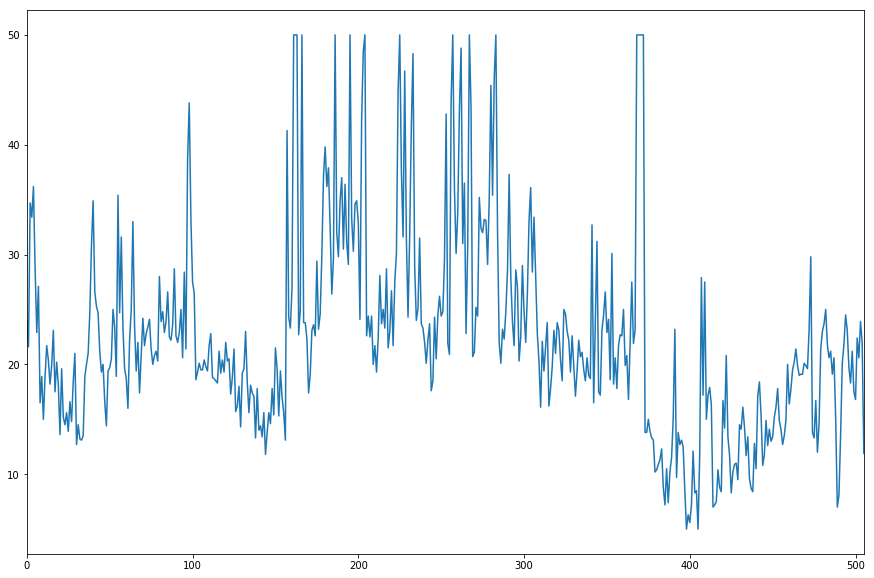

In [25]:
# Graficar Variable Respuesta
data['MEDV'].plot(figsize=(15, 10))

In [26]:
#Separar conjunto de datos en Matriz de Características y Respuesta
nombres_col=list(data.columns)
X=data[nombres_col[0:len(nombres_col)-1]]
y=data[nombres_col[len(nombres_col)-1]]

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ANN=MLPRegressor()
ANN.fit(X_train,y_train)
y_pred1=ANN.predict(X_test)

linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred2=linreg.predict(X_test)

print ("Error Red Neuronal: ", mean_squared_error(y_test,y_pred1))
print ("Error Regresion Lineal: ",mean_squared_error(y_test,y_pred2))

Error Red Neuronal:  485.2935137655393
Error Regresion Lineal:  23.380836480270972


In [33]:
import warnings 
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler  
warnings.simplefilter('ignore')

parameters = {'hidden_layer_sizes': np.array(range(2,20)), 'activation': ('identity', 'logistic', 'tanh', 'relu'), 'solver': ('lbfgs', 'sgd', 'adam'),'warm_start':[False,True]}

scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


ANN=MLPRegressor(max_iter=100)
clf = GridSearchCV(ANN, parameters,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)
MLP= clf.best_estimator_
y_pred1=clf.predict(X_test)
print ("Error Red Neuronal: ", mean_squared_error(y_test,y_pred1))
print ("Error Regresion Lineal: ", mean_squared_error(y_test,y_pred2))

Error Red Neuronal:  26.371190584686023
Error Regresion Lineal:  33.31360656409282


In [34]:
from sklearn.model_selection import KFold

resultados_linreg=[]
resultados_MLP=[]
X=np.array(X)

kf = KFold(n_splits=5)
for k, (train, test) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train,:], X[test,:]
    y_train, y_test = y[train], y[test]
    linreg=LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred2=linreg.predict(X_test)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)  
    clf.fit(X_train,y_train)
    y_pred1=clf.predict(X_test)
    resultados_linreg.append(mean_squared_error(y_test,y_pred2))
    resultados_MLP.append(mean_squared_error(y_test,y_pred1))
print ("Resultado MLP: ",resultados_MLP)
print ("Promedio MLP: ",np.mean(resultados_MLP))
print ("Resultado LinReg: ",resultados_linreg)
print ("Promedio LinReg: ",np.mean(resultados_linreg))

Resultado MLP:  [11.530448636729583, 23.75010424592903, 37.77380020639084, 60.45890021925933, 48.43735997302605]
Promedio MLP:  36.39012265626697
Resultado LinReg:  [12.460300569201422, 26.048621106234926, 33.074137979764124, 80.7623711191967, 33.31360656409282]
Promedio LinReg:  37.131807467698


## Recursos adicionales

Regresión lineal:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by me
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

Seaborn:

- [Official seaborn tutorial](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
- [Example gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)

## Comentarios o Preguntas?

- Email: <hector.allende@pucv.cl>

In [35]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()